In [4]:
import os
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/gmaur_models/')

In [5]:
%pylab inline
import numpy as np
from matplotlib import cm
from matplotlib import rc
import matplotlib.pylab as plb
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=False)
rc('mathtext', fontset = 'stix')

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
BIGGEST_SIZE = 16

rc('font', size=SMALL_SIZE)          # controls default text sizes
rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
rc('figure', titlesize=BIGGEST_SIZE) 
pk = {'color':'gray','lw':1, 'ls':'dotted'}

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### Initialize runs for GM Auriga
Initial disk model:
+ hydro components:
    + gas
    + small dust (dust1)
    + large dust (dust2)
    
Directories:
+ gmaur_0005: gas + dust model from Zhang 2021 with infall at 50-70 AU
+ gmaur_p1: same disk but with 1 jupiter mass planet at 60 AU

In [6]:
from fargo_disks import *
run_list = ['gmaur_0005','gmaur_p1']
key_list = ['hydro', 'dust1', 'dust2']
gmaur = initialize(run_list)

# Here gmaur is a dictionary that contains the models in run_list
# The key is the name of the run directory e.g. 'gmaur_0005'
# Each model is a Disk object that has the attributes of it's class and a set of helper functions to access
# and manipulate the data
# Some basics:
# disk.r = the radii of the simulation grid
# disk.phi = the azimuthal angles of the simulation grid 
# disk.get(time,prop=property,dim=dimension,fluid=fluid) = function to get data
##### time = the number corresponding to the time of the simulation snapshot, must be an integer
##### property = string designating what property of the disk you're grabbing
########## can be 'sigma' = surface density 'vr' = radial velocity 'vphi' = azimuthal velocity
##### dimension = whether the data is radially averaged or not, dim = 1 is radially averaged, can leave it blank for 2d array
##### fluid = which component of the hydrodynamic simulation you want to plot
########## 'gas', 'dust1', or 'dust2'

outputs/gmaur_0005
outputs/gmaur_p1


### Initial Conditions Disk Model Plot
Shown here for the model at t = 0 (before the simulation starts)

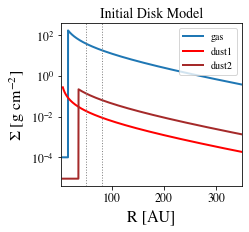

In [7]:
f, ax = subplots(1)
f.set_size_inches(3.25,3)
species = {'gas':{'color':'C0'},'dust1':{'color':'red'},'dust2':{'color':'brown'}}
i = gmaur[run_list[0]] # assigning a model to 'i' 
t = 0 #simulation time = 0 --> unperturbed initial disk model
for fluid in species.keys(): 
    s0 = i.get(t, prop='sigma',dim=1,fluid=fluid) #get 1d surface density
    color = species[fluid]['color']
    ax.semilogy(i.r,s0, lw=2,color=color,label=fluid)
    
ax.set_xlim(1,350)
ax.axvline(i.pars['rin'],**pk)
ax.axvline(i.pars['rout'],**pk)
ax.set_xlabel('R [AU]')
ax.set_title('Initial Disk Model',fontsize=14)
ax.set_ylabel('$\Sigma \ \mathrm{[g \ cm^{-2}]}$')
ax.legend()

### 1D Surface Densities of the two models
Comparison of the two models (infall vs. planet) at different simulation times

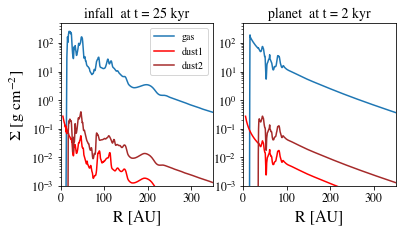

In [8]:
f, ax = subplots(1,2)
f.set_size_inches(6,3)
times = [25,2]
species = {'gas':{'color':'C0'},'dust1':{'color':'red'},'dust2':{'color':'brown'}}
for run,t,a,model in zip(run_list,times,ax,['infall','planet']):
    for fluid in species.keys():
        i = gmaur[run]
        st = i.get(t,prop='sigma',dim=1,fluid=fluid)
        color = species[fluid]['color']
        a.semilogy(i.r,st, lw=1.5,color=color,label=fluid)
        a.set_xlim(0,350)
        a.set_ylim(1e-3,5e2)
        a.set_xlabel('R [AU]')
        a.set_title(model + '\t at t = {} kyr'.format(str(t)),fontsize=14)

ax[0].set_ylabel('$\Sigma \ \mathrm{[g \ cm^{-2}]}$')
ax[0].legend()

### 2D surface density plots 

planet

/Users/Maya/Desktop/radmc3d-2.0/gmaur_models/fargo_disks/plot_funcs.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  obj=ax.pcolormesh(x,y, np.log10(FIELD*scale).T,rasterized=True, **plot_kwargs)


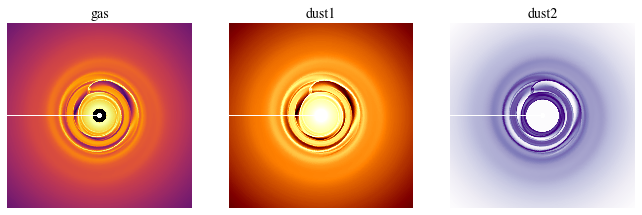

In [9]:
run = gmaur['gmaur_p1']
time = 2
rlim = 200
cmap = 'afmhot'
species = {'gas':{'color':'C0','cmap':'inferno','vmin':-1,'vmax':2.1},
           'dust1':{'color':'red','cmap':'afmhot','vmin':-4,'vmax':-1},
           'dust2':{'color':'brown','cmap':'Purples','vmin':-2.5,'vmax':-0.5}}


f,ax = subplots(1,3)
f.set_size_inches(3*3.75,4)
for fluid,a in zip(species.keys(),ax):
    sigma = run.get(time,prop='sigma',fluid=fluid)
    vmin=species[fluid]['vmin']
    vmax=species[fluid]['vmax']
    cmap=species[fluid]['cmap']
    mk = {'vmin':vmin,'vmax':vmax,'cmap':cmap}
    plot_pol(run,time,prop=sigma,axin=a,**mk)
    a.set_title(fluid,fontsize=14)
for a in ax:
    a.axis('scaled')
    a.set_xlim(-rlim,rlim)
    a.set_ylim(-rlim,rlim)
    a.axis('off')     

infall

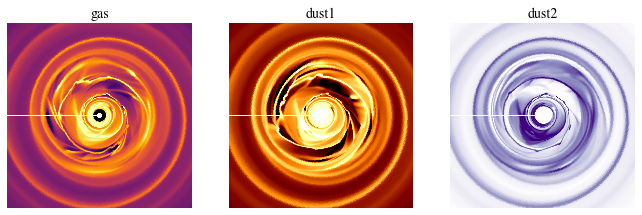

In [10]:
run = gmaur['gmaur_0005']
time = 25
rlim = 200
cmap = 'afmhot'
species = {'gas':{'color':'C0','cmap':'inferno','vmin':-1,'vmax':2.1},
           'dust1':{'color':'red','cmap':'afmhot','vmin':-4,'vmax':-1},
           'dust2':{'color':'brown','cmap':'Purples','vmin':-2.5,'vmax':-0.5}}

f,ax = subplots(1,3)
f.set_size_inches(3*3.75,4)

for fluid,a in zip(species.keys(),ax):
    sigma = run.get(time,prop='sigma',fluid=fluid)
    vmin=species[fluid]['vmin']
    vmax=species[fluid]['vmax']
    cmap=species[fluid]['cmap']
    mk = {'vmin':vmin,'vmax':vmax,'cmap':cmap}
    plot_pol(run,time,prop=sigma,axin=a,**mk)
    a.set_title(fluid,fontsize=14)
    
for a in ax:
    a.axis('scaled')
    a.set_xlim(-rlim,rlim)
    a.set_ylim(-rlim,rlim)
    a.axis('off')     

### Theta coordinates and 3D grid (transformations)      

In [11]:
theta_input = np.linspace(0, np.pi/2, 512)

In [12]:
model = gmaur[run_list[0]] # model = gmaur_0005, gas & dust model with infall at 50-70 AU

In [13]:
model1 = gmaur[run_list[1]]

In [14]:
r, theta, phi = np.meshgrid(model.r, theta_input, model.phi) # 3d grid but r is cylindrical

In [15]:
np.shape(theta[-1,:,:]) # 2d slice of where it's pi/2 (midplane)

(512, 512)

### 2D surface density

In [16]:
# unperturbed initial disk model
# 2d grid of surface density in spherical

sd = model.get(time=0,prop='sigma',fluid='dust1') # 2d

### Compute midplane densities

In [17]:
Rstar = 1 # AU
B = 1.25 
a = 2.25
h0 = model.pars['AspectRatio']
rho0 = 1

In [18]:
h = h0 * (r / Rstar)**B # scale height in 3d cylindrical

# h is in the order of theta, r, phi

In [19]:
rho = np.zeros_like(h) # 3d
rho[-1,:,:] += sd / ((np.sqrt(2*np.pi)) * (h[-1,:,:] * 1.496 * 10**13)) # 2d midplane density at theta = pi/2

Text(0, 0.5, 'Midplane Densities [g/cm^3]')

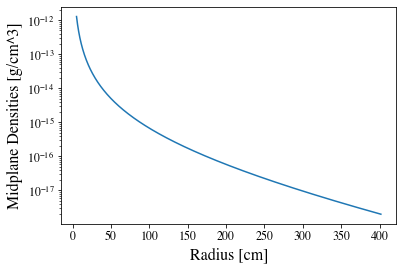

In [20]:
plt.plot(model.r, rho[-1,:,0]) # 1d midplane densities
plt.yscale('log')
plt.xlabel('Radius [cm]')
plt.ylabel('Midplane Densities [g/cm^3]')

### Volume Densities

In [21]:
def vol_densities(r_spher, theta, h, rho_midplane): # 1D volume density
    #r_spher = r_cyl / np.sin(theta)
    return rho_midplane * np.exp(-0.5 * (r_spher*np.cos(theta) / h)**2)

# scaling midplane densities w this factor

In [22]:
for i in range(1, len(theta_input)):
    h_slice = h[-1-i,:,:]
    theta_slice = theta[-1-i,:,:]
    r_slice = r[-1-i,:,:]
    rho_midplane = rho[-1,:,:]
    
    rho[-1-i,:,:] += vol_densities(r_slice, theta_slice, h_slice, rho_midplane)

### Conversion of rho slices to r and z to plot

In [23]:
r_slice = r[:,:,0] # in spherical already
theta_slice = theta[:,:,0]

In [24]:
#r_spher = r_slice / np.sin(theta_slice)

In [25]:
z_slice = r_slice * np.cos(theta_slice)
z_slice[0] = 0

In [26]:
rho[rho < 0] = 10**-30

<ipython-input-27-883a18cf98c7>:1: RuntimeWarning: divide by zero encountered in log10
  pcolormesh(r_slice, z_slice, np.log10(rho[:,:,0]), vmin = -30, vmax = -10) # vmin = -30, vmax = -10, np.log10(rho[:,:,0])
<ipython-input-27-883a18cf98c7>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolormesh(r_slice, z_slice, np.log10(rho[:,:,0]), vmin = -30, vmax = -10) # vmin = -30, vmax = -10, np.log10(rho[:,:,0])


Text(0, 0.5, 'Z')

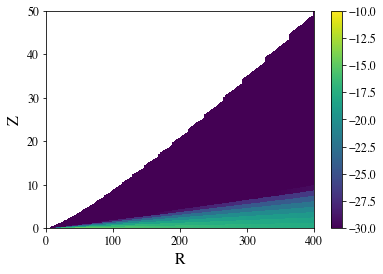

In [27]:
pcolormesh(r_slice, z_slice, np.log10(rho[:,:,0]), vmin = -30, vmax = -10) # vmin = -30, vmax = -10, np.log10(rho[:,:,0])
colorbar()
xlim(0, 400)
ylim(0, 50)
xlabel('R')
ylabel('Z')

### Functions

In [28]:
from scipy.interpolate import griddata
run = gmaur['gmaur_0005']
time =25

def subsample(run,time, Nr=128, Nphi=64):
    sigma = run.get(time,prop='sigma',fluid='dust1')
    x,y = run.xy()
    new_r = np.linspace(np.amin(run.r),np.amax(run.r),Nr)
    new_phii = np.linspace(0,2*pi, Nphi+1) #cell faces
    new_phi = (new_phii[1:] + new_phii[:-1])/2. # cell centers
    R, PHI = np.meshgrid(new_r,new_phi)
    new_x = R*np.cos(PHI)
    new_y = R*np.sin(PHI)
    new_sigma = griddata((x.ravel(),y.ravel()), sigma.T.ravel(), (new_x,new_y),method='nearest')
    return new_r, new_phi, new_sigma.T

In [29]:
def volume_densities(time_input: int, model_num: int, theta_input=np.linspace(np.pi/4, np.pi/2, 45), Rstar=1, a=2.25, rho0=1):
    """ model_num = 0 -> gmaur_0005 (gas & dust model with infall at 50-70 AU)
        model_num = 1 -> gmaur_p1 (same disk but with 1 Jupiter mass planet at 60 AU)
    """
    # Model setup
    model = gmaur[run_list[model_num]] 
    B = model.pars['FlaringIndex'] + 1
    h0 = model.pars['AspectRatio'] * 10
    
    # 2D surface density
    new_r, new_phi, sd = subsample(model, time_input, Nphi=512) #128
    
    r, theta, phi = np.meshgrid(new_r, theta_input, new_phi)

    # Volume densities
    h = h0 * (r * np.sin(theta) / Rstar)**B
    rho = np.zeros_like(h)
    rho[-1,:,:] += sd / ((np.sqrt(2*np.pi)) * (h[-1,:,:] * 1.496 * 10**13))
    rho_midplane = rho[-1,:,:]
    
    for i in range(1, len(theta_input)):
        h_slice = h[-1-i,:,:]
        theta_slice = theta[-1-i,:,:]
        r_slice = r[-1-i,:,:]
        rho[-1-i,:,:] += vol_densities(r_slice, theta_slice, h_slice, rho_midplane)
        #plt.semilogy(r[-1-i,:,0], rho[-1-i,:,0])
    
    return (r, theta, phi), rho

In [30]:
def plot_rz(r, theta, phi, rho):
    r_slice = r[:,:,0] 
    theta_slice = theta[:,:,0]
    r_cyl = r_slice * np.sin(theta_slice)
    
    # Converting to Z
    z_slice = r_slice * np.cos(theta_slice)
    #z_slice[0] = 0
    
    # Removing -inf values
    rho[rho < 0] = 10**-30
    
    # Plot
    contourf(r_cyl, z_slice, np.log10(rho[:,:,0]), levels=np.arange(-30,-10)) # vmin = -30, vmax = -10, np.log10(rho[:,:,0])
    colorbar()
    ylim(0, 50)
    xlim(0, 400)
    xlabel('R')
    ylabel('Z')

In [31]:
def get_midplane(time_input: int, model_num: int, Rstar=1, a=2.25, rho0=1, color=None):
    """ model_num = 0 -> gmaur_0005 (gas & dust model with infall at 50-70 AU)
        model_num = 1 -> gmaur_p1 (same disk but with 1 Jupiter mass planet at 60 AU)
    """
    # Model setup
    #model = gmaur[run_list[model_num]] 
    #h0 = model.pars['AspectRatio']
    #B = model.pars['FlaringIndex'] + 1
    #h = h0 * (r / Rstar)**B 
    
    # 2D surface density
    #sd = model.get(time=time_input,prop='sigma',fluid='dust1') 
    
    # Midplane densities
    #rho = np.zeros_like(h) 
    #rho[-1,:,:] += sd / ((np.sqrt(2*np.pi)) * (h[-1,:,:] * 1.496 * 10**13))
    
    (r, theta, phi), rho = volume_densities(time_input, model_num)
    
    plt.xlim(0, 300)
    plt.yscale('log')
    plt.xlabel('Radius [AU]')
    plt.ylabel('Midplane Densities [$g/cm^3$]')
    if(model_num == 0):
        if(color == None):
            plt.plot(model.r, rho[-1,:,0], color='pink', label='Infall')
            #plb.savefig('/Users/Maya/Desktop/infall/infall_pics.png', dpi=500, bbox_inches='tight')
        else:
            plt.plot(model.r, rho[-1,:,0], color=color) 
        plt.title('Infall Midplane Density vs. Radius at t = ' + str(time_input) + ' kyr', size=16)
    if(model_num == 1):
        if(color == None):
            plt.plot(model.r, rho[-1,:,0], color='purple', label='Planetary') 
        else:
            plt.plot(model.r, rho[-1,:,0], color=color) 
        plt.title('Planetary Midplane Density vs. Radius at t = ' + str(time_input) + ' kyr', size=16)
    plt.legend(loc="upper right")

### R vs. Z examples (MODEL 0)

In [32]:
#(r0, theta0, phi0), rho0 = volume_densities(0, 0)

In [33]:
#plot_rz(r0, theta0, phi0, rho0)

In [34]:
#(r2, theta2, phi2), rho2 = volume_densities(2, 0)

In [35]:
#plot_rz(r2, theta2, phi2, rho2)

In [36]:
#(r25, theta25, phi25), rho25 = volume_densities(25, 0)

In [37]:
#plot_rz(r25, theta25, phi25, rho25)

### R vs. Z (MODEL 1)

In [38]:
#(r0, theta0, phi0), rho0 = volume_densities(0, 1)

In [39]:
#plot_rz(r0, theta0, phi0, rho0)

In [40]:
#(r2, theta2, phi2), rho2 = volume_densities(2, 1)

In [41]:
#plot_rz(r2, theta2, phi2, rho2)

In [42]:
#(r25, theta25, phi25), rho25 = volume_densities(25, 1)

In [43]:
#plot_rz(r25, theta25, phi25, rho25)

### Midplane Densities examples

In [44]:
#get_midplane(0, 0)

In [45]:
#get_midplane(0, 1)

In [46]:
#get_midplane(5, 0)
#axvline(50)
#axvline(70)

ValueError: x and y must have same first dimension, but have shapes (512,) and (128,)

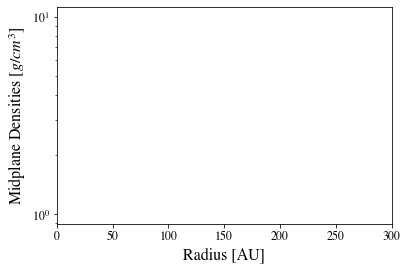

In [47]:
get_midplane(5, 1)
get_midplane(0, 1, color='grey')
xlim(0,150)
plt.title('Planetary Midplane Density vs. Radius at t = 5 kyr', size=16)

In [ ]:
get_midplane(25, 0)
get_midplane(0, 0, color='grey')
xlim(0,150)
plt.title('Infall Midplane Density vs. Radius at t = 25 kyr', size=16)

In [ ]:
get_midplane(25, 0)
get_midplane(5, 1)
xlim(0,60)
plt.title('Mass/Unit Volume vs. Radius at t=5/25', size=16)

## Making the Inputs for RADMC

In [ ]:
# %load write_data.py
def make_faces(centers):
    # centers is a tuple of 1d-arrays (r,theta,phi) of length (Nr, Ntheta, Nphi)
    faces = []
    for x in centers:
        dx = np.gradient(x) #calculate the spacing between cell centers
        faces.append(np.append(x - dx/2., x[-1] + dx[-1]/2.))
    return faces
        
def write_grid(faces_3d):
    #faces_3d is expected to be a tuple of 1d-arrays (r, theta, phi) of length (Nr+1, Ntheta+1, Nphi+1) that describe
    # the faces of the cells containing the data
    iformat = 1
    grid_style = 0 # for "regular grid"
    coordsystem = 101 # between 1 and 200 for a spherical grid
    gridinfo = 0 
    incl_x, incl_y, incl_z = [1,1,1] # for a 3 dimensional grid
    nx,ny,nz = [len(i)-1 for i in faces_3d]
    r, theta, phi = [i for i in faces_3d]
    r *= AU #convert to cm for radmc3d
    header = str(iformat) + '\n' + str(grid_style) + '\n' + str(coordsystem) + '\n' + str(gridinfo) + '\n' + str(incl_x) + '\t' + str(incl_y) + '\t' + str(incl_z) + '\n' + str(nx) + '\t' + str(ny) + '\t' + str(nz) + '\n' # header info radmc wants
    with open("amr_grid.inp","w") as f: # writes the file in your current directory
        f.write(header)
        for x, fmt  in zip([r,theta,phi],['%13.6e','%17.10e','%13.6e']):
            x.tofile(f, sep= '\t', format=fmt)
            f.write('\n')
    f.close()
        
def write_dust_density(rho_vol): #takes the volume density 
    Ncells = np.prod(np.shape(rho_vol)) # total number of cells for radmc3d 
    with open('dust_density.inp','w+') as c:
        rho_vol = rho_vol.swapaxes(0,1)
        c.write('1\n')                   # Format number
        c.write('%d\n'%(Ncells))           # Number of cells
        c.write('1\n')                   # Number of dust species
        data = rho_vol.ravel(order='F')         # Create a 1-D view, fortran-style indexing
        data.tofile(c, sep='\n', format="%13.6e")
        c.write('\n')
    c.close()

In [ ]:
pwd

# Infall Model at t = 0

In [ ]:
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/gmaur_models/infall')

In [ ]:
theta_polar = np.linspace(0.7, 1.25, 32)
theta_eq = np.linspace(1.26, np.pi/2, 64)
theta_input = np.append(theta_polar, theta_eq)
model = gmaur[run_list[0]] # model = gmaur_0005, gas & dust model with infall at 50-70 AU

In [ ]:
(r00, theta00, phi00), rho00 = volume_densities(0, 0, theta_input)

In [ ]:
new_r, new_phi, sd = subsample(model,25, Nphi=128)

In [ ]:
faces = make_faces((new_r, theta_input, new_phi))

In [ ]:
faces[1][0] = 0
faces[1][-1] = np.pi/2

In [ ]:
write_grid(faces)

In [ ]:
write_dust_density(rho00) 

In [ ]:
plot_rz(r00, theta00, phi00, rho00)
xlim(0, 100)
ylim(0, 100)

# Infall model at t = 25

In [ ]:
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/gmaur_models/infall/infall_t=25')

In [ ]:
theta_input = np.linspace(0.7, np.pi/2, 80)
model = gmaur[run_list[0]] # model = gmaur_0005, gas & dust model with infall at 50-70 AU

In [ ]:
(r25, theta25, phi25), rho25 = volume_densities(25, 0, theta_input)

In [ ]:
new_r, new_phi, sd = subsample(model,25, Nphi=512)

In [ ]:
faces = make_faces((new_r, theta_input, new_phi))

In [ ]:
faces[1][0] = 0
faces[1][-1] = np.pi/2

In [ ]:
write_grid(faces)

In [ ]:
write_dust_density(rho25) 

# Planet at t = 5

In [ ]:
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/gmaur_models/planet')

In [ ]:
theta_input = np.linspace(0.7, np.pi/2, 80)
model = gmaur[run_list[1]] 

In [ ]:
(r5, theta5, phi5), rho5 = volume_densities(5, 1, theta_input)

In [ ]:
new_r, new_phi, sd = subsample(model,5, Nphi=512)

In [ ]:
faces = make_faces((new_r, theta_input, new_phi))

In [ ]:
faces[1][0] = 0
faces[1][-1] = np.pi/2

In [ ]:
write_grid(faces)

In [ ]:
write_dust_density(rho5) 

In [ ]:
# source ~/.bashrc